In [1]:
!pip install textblob 

In [1]:
from textblob import TextBlob
import pandas as pd

In [2]:
cg = pd.read_csv('turkey_processed.csv', encoding = 'ISO-8859-1')

In [3]:
#define function for subjectivity (Personal opinions [0,1])
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

In [4]:
#define function for polarity (Actual sentiment [-1, 1])
def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity

In [5]:
#apply both functions subjectivity and polarity to clean tweet
cg['Subjectivity'] = cg['clean_tweet'].apply(getTextSubjectivity)
cg['Polarity'] = cg['clean_tweet'].apply(getTextPolarity)

In [6]:
#define function for polarity calculation
def getTextAnalysis(a):
  if a<0:
    return "Depressed"
  elif a==0:
    return "Neutral"
  else:
    return "Happy"

In [7]:
cg['score'] = cg['Polarity'].apply(getTextAnalysis)

In [8]:
cg.head()

,Unnamed: 0,Date,Time,user,Tweet,clean_tweet,Subjectivity,Polarity,score
0,0,2023-02-10 23:59:10+00:00,23:59:10,Jerusalem_Post,The situation in Kahramanmaras proved civiliza...,The situation in Kahramanmaras proved civiliza...,0.825000,0.000000,Neutral
1,1,2023-02-10 23:58:58+00:00,23:58:58,Punnycatapult,"Please donate, like share RAISE AWARENESS THAT...",Please donate like share RAISE AWARENESS THAT ...,0.750000,0.068182,Happy
2,2,2023-02-10 23:58:21+00:00,23:58:21,HosenMosharraf1,Alhamdulilllah they are safe and sound Ã¢ÂÂ¤Ã...,Alhamdulilllah they are safe and sound,0.450000,0.450000,Happy
3,3,2023-02-10 23:58:19+00:00,23:58:19,TodaywithBenja,@patagonia @fcdsurfboards Send the best warmes...,patagonia fcdsurfboards Send the best warmest ...,0.766667,-0.133333,Depressed
4,4,2023-02-10 23:58:19+00:00,23:58:19,ib_mohh,Alhamdulillah ...A 10 day old baby was rescued...,Alhamdulillah A 10 day old baby was rescued al...,0.300000,0.100000,Happy


In [9]:
cg.tail()

,Unnamed: 0,Date,Time,user,Tweet,clean_tweet,Subjectivity,Polarity,score
48076,48076,2023-02-06 01:24:47+00:00,01:24:47,nicfrakesjourno,Big earthquake felt throughout #Lebanon just a...,Big earthquake felt throughout just a few mome...,0.275000,-0.066667,Depressed
48077,48077,2023-02-06 01:24:10+00:00,01:24:10,eliegemayel,A powerful #earthquake just hit Metn area in L...,A powerful just hit Metn area in Lebanon at 03...,0.500000,0.266667,Happy
48078,48078,2023-02-06 00:58:27+00:00,00:58:27,Mousacisse1,#Turkish Volunteers Train For The Ukrainian Fr...,Volunteers Train For The Ukrainian Frontlines...,0.335714,0.128571,Happy
48079,48079,2023-02-06 00:00:01+00:00,00:00:01,1MedyaNews,Ã°ÂÂÂThe #Turkish authorities have demanded...,The authorities have demanded the former mayor...,0.000000,0.000000,Neutral
48080,48080,2023-02-06 00:00:00+00:00,00:00:00,medyanews_,Ã°ÂÂÂThe #Turkish authorities have demanded...,The authorities have demanded the former mayor...,0.000000,0.000000,Neutral


In [12]:
import matplotlib.pyplot as plt

In [17]:
#calculating percentage of happy tweets 
happy=cg[cg['score']=="Happy"]
print(str(happy.shape[0]/(cg.shape[0])*100)+" % Happy Tweets")
Happy=happy.shape[0]/cg.shape[0]*100

33.80337347392941 % Happy Tweets


In [18]:
#calculating percentage of neutral tweets
neutral=cg[cg['score']=="Neutral"]
print(str(neutral.shape[0]/(cg.shape[0])*100)+" % Neutral Tweets")
Neutral=neutral.shape[0]/cg.shape[0]*100

43.87179967138787 % Neutral Tweets


In [19]:
#calculating percentage of depressed tweets
depressed=cg[cg['score']=="Depressed"]
print(str(depressed.shape[0]/(cg.shape[0])*100)+" % Depressed Tweets")
Depressed=depressed.shape[0]/cg.shape[0]*100

22.324826854682723 % Depressed Tweets


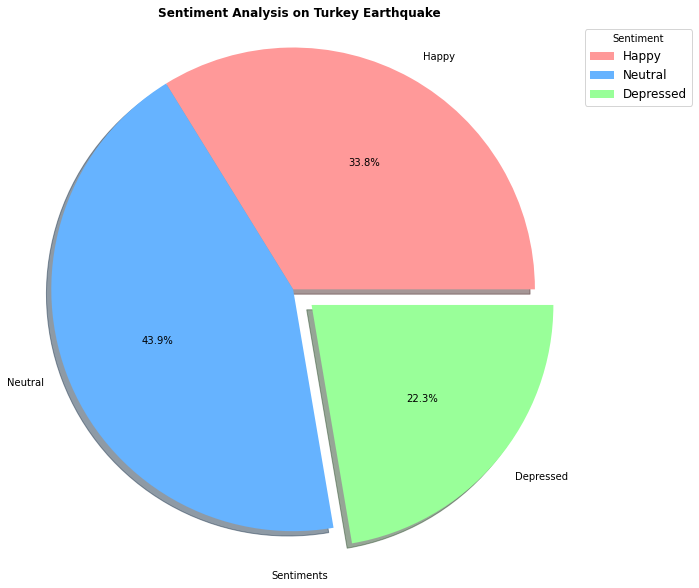

In [20]:
# Pie chart

labels = ['Happy', 'Neutral', 'Depressed']
sizes = [Happy, Neutral, Depressed]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0, 0, 0.1)  # only "explode" the 3rd slice 

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', 
        shadow=True, startangle=0)
ax1.axis('equal')
plt.xlabel("Sentiments")
#plt.ylabel("Percentage")
plt.title("Sentiment Analysis on Turkey Earthquake", fontweight='bold')
plt.legend(title='Sentiment', labels=labels, loc="upper left", bbox_to_anchor=(1,1), fontsize=12)
plt.show()

<BarContainer object of 3 artists>

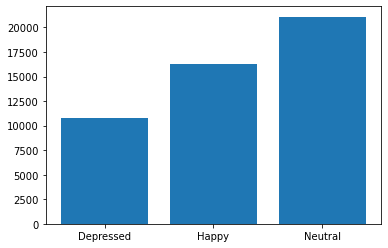

In [21]:
#bar chart
labels = cg.groupby('score').count().index.values
values = cg.groupby('score').size().values
plt.bar(labels,values)

In [22]:
#performance evaluation
from sklearn.model_selection import train_test_split

In [24]:
train_data , test_data = train_test_split(cg, test_size=0.3, random_state= 42)

In [25]:
test_data['predicted'] = test_data['Polarity'].apply(getTextAnalysis)

In [26]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_data['score'], test_data['predicted'])
print("Accuracy:" , score)

Accuracy: 1.0
